In [1]:
#the other type of supervised learning is regression

In [3]:
import pandas as pd
import numpy as np

In [5]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = diabetes_df.drop('glucose', axis = 1).values
y = diabetes_df['glucose'].values
print(X.shape, y.shape)
print(type(X), type(y))

(768, 8) (768,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [14]:
#let's predict off just one feature
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [15]:
#all features have to be in a two dimensional array
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768, 1)


In [12]:
import matplotlib.pyplot as plt

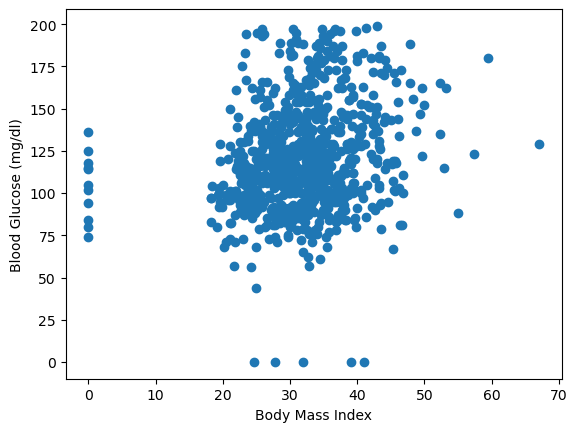

In [17]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

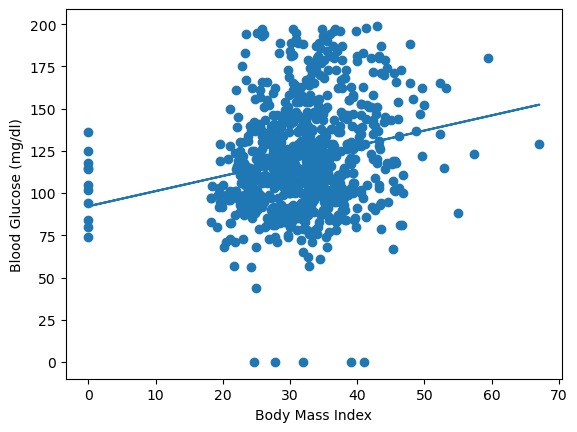

In [24]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [25]:
#now let's do multiple linear regression (regression based on multiple features)
#y = ax1 + ax2 + ax3 ... + axn + b

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [30]:
reg_all.score(X_test, y_test)

0.28280468810375137

In [32]:
from sklearn.metrics import mean_squared_error
#the following calculates the root mean squared error, not the mean squared error
mean_squared_error(y_test, y_pred, squared=False)

26.34145958223226

In [33]:
#k-fold CV (k-fold cross validation, essentially create k number of folds or mini-datasets to cross validate the value of R^2)

In [34]:
from sklearn.model_selection import cross_val_score, KFold

In [36]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


In [38]:
print(np.mean(cv_results), np.std(cv_results))

0.3190969786734479 0.0701532061011417


In [40]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.24088592 0.41580685]


In [41]:
#regularized regression, a technique used to avoid overfitting
#essentially, to get the best fit (minimize the cost function), large coefficients are typically acceptable
#regularized regression penalizes large coefficients, because they can lead to overfitting

In [42]:
#first kind of regularized regression is ridge regression, which penalizes large negative and positive coefficients
#essentially adds a constant alpha to the loss function. we pick the value of alpha, like picking k in KNN
#alpha is a hyper parameter, which means a variable used to optimize model parameters
#alpha controls complexity: high alpha means heavy penalization and risk of underfitting, vice versa for low alpha

In [44]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1, 10, 100, 1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

print(scores)

[0.28284666232222233, 0.28320633574804777, 0.2853000732200003, 0.26423984812668133, 0.19292424694100963]


In [45]:
#next is lasso regression
#basically the same as reg, just utilizes absolute value instead of square

In [48]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1, 10, 20, 50]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273882, 0.18127361610181125, 0.15679544303617965]


In [49]:
#lasso regression can be used to select features, by shrinking coefficients of less important features to 0

In [50]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop('glucose',axis=1).values
y = diabetes_df['glucose'].values
names = diabetes_df.drop('glucose',axis=1).columns

In [51]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

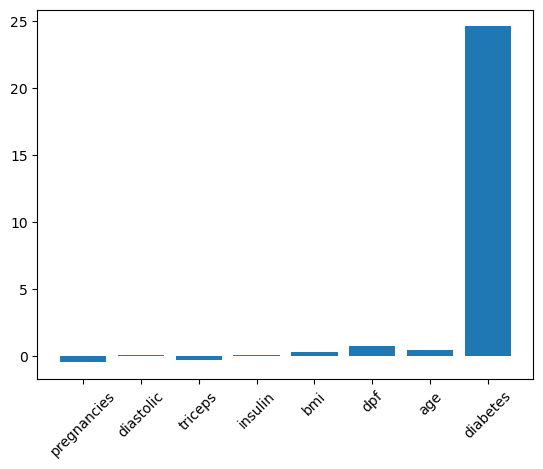

In [53]:
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()